In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('G:\Training\SmsSpam.csv', encoding='latin-1')

In [3]:
df.head( )

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5573, 5)

## 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5573 non-null   object
 1   v2          5573 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [7]:
df.sample(5)

,v1,v2
2998,ham,"Oh, then your phone phoned me but it disconnected"
2407,ham,Solve d Case : A Man Was Found Murdered On &l...
3843,ham,"Yeah that's what I thought, lemme know if anyt..."
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\..."
2170,ham,\CAN I PLEASE COME UP NOW IMIN TOWN.DONTMATTER...


In [8]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

0

## 2.EDA


In [17]:
df['target'].value_counts()

target
0    4516
1     654
Name: count, dtype: int64

In [18]:
import nltk

In [19]:
!pip install nltk

### nltk.download('punkt')

In [20]:
# number of characters
df['num_characters']=df['text'].apply(len)

In [21]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
#number of words
df['num_words']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentence']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[df['target']== 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
df[df['target']==1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,654.000000,654.000000,654.000000
mean,137.721713,27.633028,2.967890
std,30.425249,7.058921,1.489281
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

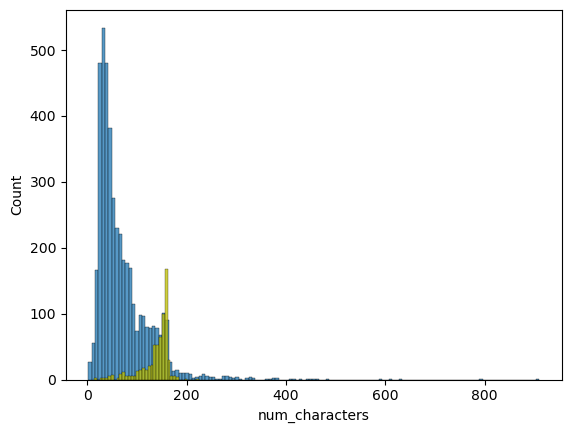

In [29]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'], color = 'y')

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


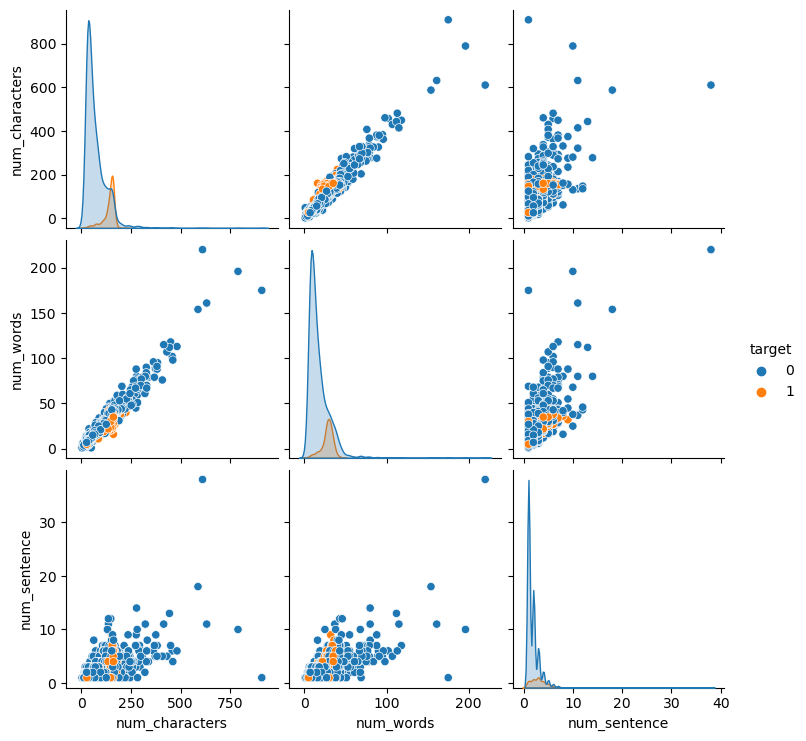

In [30]:
sns.pairplot(df, hue='target')

In [31]:
#df.corr()
df_numeric = df.select_dtypes(include=['number'])
correlation_matrix = df_numeric.corr()

<Axes: >

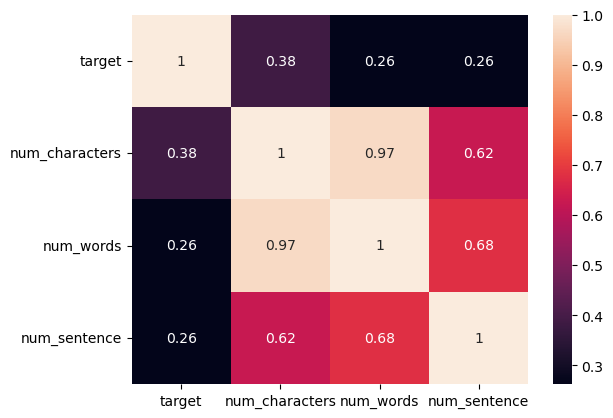

In [32]:
sns.heatmap(correlation_matrix, annot = True)

## 3.Data Preprocessing

In [33]:
import nltk
nltk.download('stopwords')
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
from nltk.corpus import stopwords


In [35]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [36]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [37]:
transform_text('hi how are you reading sayan?')

'hi read sayan'

In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.head()

,target,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


## 4.Model Building


In [40]:
# vectorizing text
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [41]:
lrc=LogisticRegression(solver='liblinear',penalty='l1')
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [42]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
X=tfidf.fit_transform(df['transformed_text']).toarray()


In [43]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [44]:
X.shape

(5170, 3000)

In [45]:
y=df['target'].values

In [46]:
y

array([0, 0, 1, ..., 0, 1, 0])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

lrc.fit(X_train,y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [48]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)
    return accuracy,precision

In [49]:
train_classifier(lrc,X_train,y_train,X_test,y_test)

(0.9574468085106383, 0.9591836734693877)

In [50]:
from sklearn.metrics import classification_report 

In [51]:
pred_log = lrc.predict(X_test)
classylrc = classification_report(y_test,pred_log)
print("Classification Report via LR :", classylrc)

Classification Report via LR :               precision    recall  f1-score   support

           0       0.96      1.00      0.98       900
           1       0.96      0.70      0.81       134

    accuracy                           0.96      1034
   macro avg       0.96      0.85      0.89      1034
weighted avg       0.96      0.96      0.95      1034



In [52]:
def predict_category(s,train = X, model = lrc):
    pred_model = model.predict([s])
    return train.target_names[pred[0]]

In [53]:
import pickle 

In [54]:
# Save the model to a file

pickle.dump(tfidf, open('vectorizer_new.pkl','wb'))

In [55]:
pickle.dump(lrc,open('model_new.pkl','wb'))

In [56]:
def predict_spam(model, vectorizer, input_text):
    transformed_text = transform_text(input_text)
    vector_input = vectorizer.transform([transformed_text])
    result = model.predict(vector_input)[0]
    return result

In [57]:
# Load the vectorizer and model used during training
tfidf = pickle.load(open('vectorizer_new.pkl', 'rb'))
model = pickle.load(open('model_new.pkl', 'rb'))


In [58]:
result = predict_spam(lrc, tfidf, 'You won 1000 rupees lottery in order to recieve the prize money log in to www.rummy.com or call at 9867543248 ASAP')
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Spam


In [59]:
result = predict_spam(lrc, tfidf, 'Sorry, I will call later')
if result == 1:
    print("Spam")
else:
    print("Not Spam")

Not Spam


In [60]:
pwd

'C:\\Users\\USER'